# Linear Regression

Import required libraries pandas - to work with data from csv file numpy - to work with array matplotlib - visualization of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Reading the CSV file as dataframe
df = pd.read_csv("Advertising.csv")
df.head() #display the first 5 rows of the dataframe

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

TV, radio and newspaper - independent variables (input variables) Sales - dependent variables (output variable)

In [4]:
#We will use only one input variable so we can visualize the resulting lines 
X = df[['TV']] #independent variable
Y = df[['sales']] #depencent variable

# Linear Regression Parameters

FIT_INTERCEPT : bool, default=True; Whether to calculate the intercept for this model

In [5]:
#Model with intercept
lreg1 = LinearRegression(fit_intercept=True)
lreg1.fit(X,Y)
Yp1 = lreg1.predict(X)

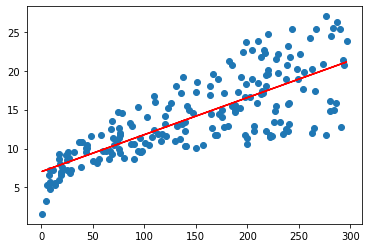

In [6]:
plt.scatter(X,Y)
plt.plot(X,Yp1,color='r')
plt.show()

In [7]:
#Model without intercept
lreg2 = LinearRegression(fit_intercept=False)
lreg2.fit(X,Y)
Yp2 = lreg2.predict(X)

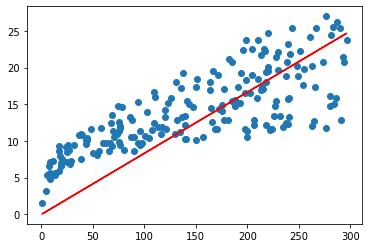

In [8]:
plt.scatter(X,Y)
plt.plot(X,Yp2,color='r')
plt.show()

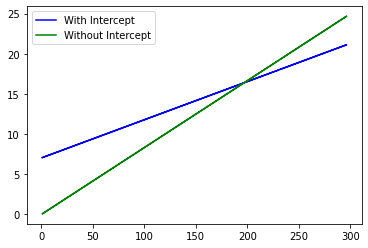

In [9]:
plt.plot(X,Yp1,color='b', label="With Intercept")
plt.plot(X,Yp2,color='g', label = "Without Intercept")
plt.legend()
plt.show()

# Linear Regression Model Attributes 

4 Model Attributes: .coef_, .rank_, .singular_ and .intercept_

In [10]:
#With Intercept
print("Coefficient/slope: ",lreg1.coef_) #Coefficient/slope
print("Rank of matrix X: ",lreg1.rank_) #Rank of matrix X - number of non-zero singular values
print("Singular values of X: ",lreg1.singular_) #Singular values of X - singular value is the square root on non-negative eigen values
print("Intercept: ",lreg1.intercept_) #Intercept

Coefficient/slope:  [[0.04753664]]
Rank of matrix X:  1
Singular values of X:  [1211.12304443]
Intercept:  [7.03259355]


In [11]:
#Without Intercept
print("Coefficient/slope: ",lreg2.coef_) #Coefficient/slope
print("Rank of matrix X: ",lreg2.rank_) #Rank of matrix X
print("Singular values of X: ",lreg2.singular_) #Singular values of X
print("Intercept: ",lreg2.intercept_) #Intercept

Coefficient/slope:  [[0.08324961]]
Rank of matrix X:  1
Singular values of X:  [2406.47426539]
Intercept:  0.0


# Linear Regression Functions

FIT(training_data, target_values, weights_for_each_sample) - fit the linear model - returns an instance of self

PREDICT(samples) - predict output using the linear model - returns array of predicted values

In [12]:
lreg1.fit(X,Y,sample_weight=np.full((200),5))
lreg2.fit(X,Y)
Yp3 = lreg1.predict(X)
Yp4 = lreg2.predict(X)

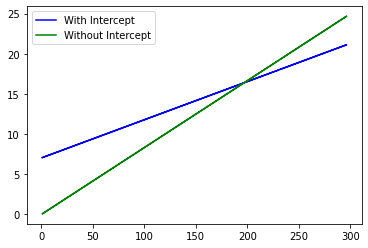

In [13]:
plt.plot(X,Yp3,color='b', label="With Intercept")
plt.plot(X,Yp4,color='g', label = "Without Intercept")
plt.legend()
plt.show()

GET_PARAMS - returns parameter names mapped to their values

In [14]:
lreg1.get_params(deep=False)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [15]:
lreg1.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [16]:
lreg2.get_params(deep=False)

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'normalize': False}

SCORE(test_samples, true_samples, sample_weights) - Returns the coefficient of determination R-squared of the prediction (float value)

In [17]:
print(lreg1.score(Yp1,Y))
print(lreg2.score(Yp2,Y))
print(lreg1.score(Yp3,Y))
print(lreg2.score(Yp4,Y))

-1.419426332085456
-6.077322116336761
-1.419426332085456
-6.077322116336761


NOTE: If the chosen model fits worse than a horizontal line, then R-squared is negative. This means the chosen model does not follow the trend of the data.

SET_PARAMS(dictionary of paramteres and mapped values)

In [18]:
lreg1.get_params() #fit_intercept is True

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [19]:
lreg1.set_params(fit_intercept='False') #set the paramter fit_intercept to False

LinearRegression(copy_X=True, fit_intercept='False', n_jobs=None,
                 normalize=False)